# A/B Test — Simulation & Two-Proportion Test

**Purpose:** Run a simulated A/B experiment for a recommendation change (Control vs Trial), compute conversion statistics, run a two-proportion z-test, show confidence intervals and a small visualization.


## 1) Import libraries


In [1]:
# for importing libraries
import numpy as np
import pandas as pd
from math import sqrt
from scipy.stats import norm
import matplotlib.pyplot as plt


## 2) Experiment configuration
- Set RNG seed, true probabilities for each arm, and sample sizes.


In [2]:
# Experiment configuration
RNG = 2025_10_14
np.random.seed(RNG)

# underlying true conversion probabilities (changeable)
p_A = 0.130   # control (A)
p_B = 0.165   # treatment (B)

# sample sizes
N_A = 4300
N_B = 4100

# confidence settings
alpha = 0.05
z_crit = norm.ppf(1 - alpha / 2)


## 3) Generate user-level simulated data
- We simulate 0/1 outcomes per visitor (Bernoulli trials).


In [3]:
conv_A = np.random.binomial(1, p_A, size=N_A)
conv_B = np.random.binomial(1, p_B, size=N_B)

df_A = pd.DataFrame({"group": "A_control", "converted": conv_A})
df_B = pd.DataFrame({"group": "B_treatment", "converted": conv_B})

df_exp = pd.concat([df_A, df_B], ignore_index=True)
df_exp.head()


,group,converted
0,A_control,0
1,A_control,0
2,A_control,0
3,A_control,1
4,A_control,0


## 4) Aggregate summary statistics
- Compute counts, conversion rates, absolute & relative lift, and per-arm SEs.


In [4]:
# counts and conversions
n_A = len(df_A)
n_B = len(df_B)
x_A = df_A["converted"].sum()
x_B = df_B["converted"].sum()

# observed rates
rate_A = x_A / n_A
rate_B = x_B / n_B

# lifts
abs_lift = rate_B - rate_A
rel_lift_pct = (abs_lift / rate_A) * 100 if rate_A > 0 else float("nan")

# per-arm standard errors (Wald)
se_A = sqrt(rate_A * (1 - rate_A) / n_A)
se_B = sqrt(rate_B * (1 - rate_B) / n_B)


## 5) Hypothesis test — two-proportion z-test (two-sided)
H0: p_A == p_B
HA: p_A != p_B


In [5]:
# pooled proportion and pooled SE
p_pool = (x_A + x_B) / (n_A + n_B)
se_pooled = sqrt(p_pool * (1 - p_pool) * (1.0 / n_A + 1.0 / n_B))

# z-statistic and two-sided p-value
z_value = (rate_B - rate_A) / se_pooled
p_two_sided = 2 * norm.sf(abs(z_value))

# 95% Wald CIs for each arm
ci_A = (rate_A - z_crit * se_A, rate_A + z_crit * se_A)
ci_B = (rate_B - z_crit * se_B, rate_B + z_crit * se_B)


## 6) Print results (neat)


In [6]:
print("A/B Test")
print("---------------------")
print(f"Seed: {RNG}")
print(f"A (control):    n={n_A:,}, conv={x_A:,}, rate={rate_A:.4f}")
print(f"B (treatment):  n={n_B:,}, conv={x_B:,}, rate={rate_B:.4f}")
print()
print(f"Absolute lift (B - A) : {abs_lift:.4f} ({abs_lift*100:.2f} percentage points)")
print(f"Relative lift vs A     : {rel_lift_pct:.2f}%")
print()
print("Per-arm standard errors:")
print(f"  SE_A = {se_A:.6f}")
print(f"  SE_B = {se_B:.6f}")
print()
print("Two-proportion z-test (two-sided):")
print(f"  z = {z_value:.4f}")
print(f"  p = {p_two_sided:.6f}")
print()
print("95% CIs (Wald):")
print(f"  A: [{ci_A[0]:.4f}, {ci_A[1]:.4f}]")
print(f"  B: [{ci_B[0]:.4f}, {ci_B[1]:.4f}]")
print()
if p_two_sided < alpha:
    print(f"Conclusion: Reject H0 at alpha={alpha}. (p={p_two_sided:.4f})")
else:
    print(f"Conclusion: Fail to reject H0 at alpha={alpha}. (p={p_two_sided:.4f})")


A/B Test
---------------------
Seed: 20251014
A (control):    n=4,300, conv=565, rate=0.1314
B (treatment):  n=4,100, conv=651, rate=0.1588

Absolute lift (B - A) : 0.0274 (2.74 percentage points)
Relative lift vs A     : 20.84%

Per-arm standard errors:
  SE_A = 0.005152
  SE_B = 0.005708

Two-proportion z-test (two-sided):
  z = 3.5656
  p = 0.000363

95% CIs (Wald):
  A: [0.1213, 0.1415]
  B: [0.1476, 0.1700]

Conclusion: Reject H0 at alpha=0.05. (p=0.0004)


## 7) Quick visualization
- Bar chart of conversion rates with 95% error bars.


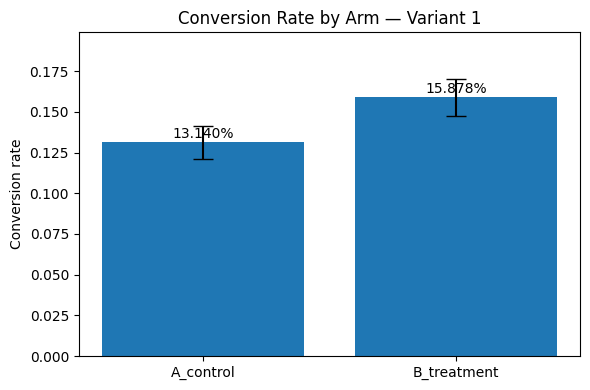

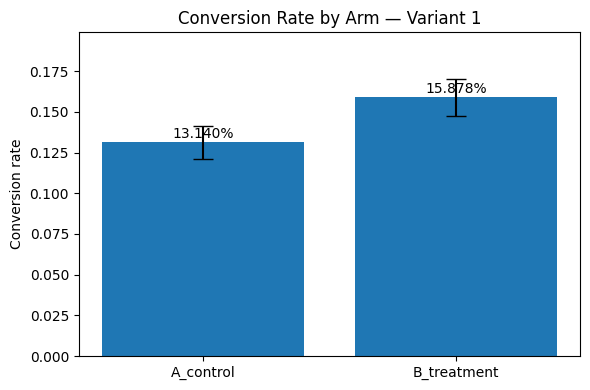

In [7]:
fig, ax = plt.subplots(figsize=(6,4))
groups = ["A_control", "B_treatment"]
rates = [rate_A, rate_B]
error_bars = [z_crit * se_A, z_crit * se_B]

ax.bar(groups, rates, yerr=error_bars, capsize=7)
ax.set_ylim(0, max(rates) + 0.04)
ax.set_ylabel("Conversion rate")
ax.set_title("Conversion Rate by Arm — Variant 1")
for i, r in enumerate(rates):
    ax.text(i, r + 0.0025, f"{r:.3%}", ha="center")
plt.tight_layout()
plt.show()
fig, ax = plt.subplots(figsize=(6,4))
groups = ["A_control", "B_treatment"]
rates = [rate_A, rate_B]
error_bars = [z_crit * se_A, z_crit * se_B]

ax.bar(groups, rates, yerr=error_bars, capsize=7)
ax.set_ylim(0, max(rates) + 0.04)
ax.set_ylabel("Conversion rate")
ax.set_title("Conversion Rate by Arm — Variant 1")
for i, r in enumerate(rates):
    ax.text(i, r + 0.0025, f"{r:.3%}", ha="center")
plt.tight_layout()
plt.show()
